# Neural Network Programming – Deep Learning with PyTorch

Blog: http://deeplizard.com/learn/video/v5cngxo4mIg

# Part 2: Neural Networks and Deep Learning with PyTorch

## Importance of Data in Deep Learning - Fashion MNIST for Artificial Intelligence

Blog: http://deeplizard.com/learn/video/EqpzfvxBx30

# ETL with the PyTorch ```Dataset``` and ```DataLoader``` classes

Blog: http://deeplizard.com/learn/video/8n-TGaBZnk4

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

In [16]:
train_set = torchvision.datasets.FashionMNIST(
    root='../MNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [17]:
train_loader = torch.utils.data.DataLoader(train_set)

## PyTorch Datasets and DataLoaders - Training Set Exploration for Deep Learning and AI

Blog: http://deeplizard.com/learn/video/mUueSPmcOBc

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
train_set = torchvision.datasets.FashionMNIST(
    root='../MNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

### Working with the training set

In [21]:
len(train_set)

60000

In [22]:
train_set.train_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [23]:
train_set.train_labels.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [27]:
print(train_set.train_data.shape)

torch.Size([60000, 28, 28])


In [34]:
train_set_image_0 = train_set.train_data[train_set.train_labels==0][:5000]
train_set_image_1 = train_set.train_data[train_set.train_labels==1][:5000]
train_set_image_2 = train_set.train_data[train_set.train_labels==2][:5000]
train_set_image_3 = train_set.train_data[train_set.train_labels==3][:5000]
train_set_image_4 = train_set.train_data[train_set.train_labels==4][:5000]
train_set_image_5 = train_set.train_data[train_set.train_labels==5][:5000]
train_set_image_6 = train_set.train_data[train_set.train_labels==6][:5000]
train_set_image_7 = train_set.train_data[train_set.train_labels==7][:5000]
train_set_image_8 = train_set.train_data[train_set.train_labels==8][:5000]
train_set_image_9 = train_set.train_data[train_set.train_labels==9][:5000]

In [45]:
train_set_individual = [train_set.train_data[train_set.train_labels==i] for i in range(10)]
train_loader_individual = [torch.utils.data.DataLoader(
    train_set_individual[i],
    batch_size=10,
    shuffle=True) for i in range(10)]

In [48]:
sample = next(iter(train_loader_individual[0]))
sample = sample.unsqueeze(dim=1)
print(sample.shape)

torch.Size([10, 1, 28, 28])


torch.Size([3, 32, 302])


NameError: name 'labels' is not defined

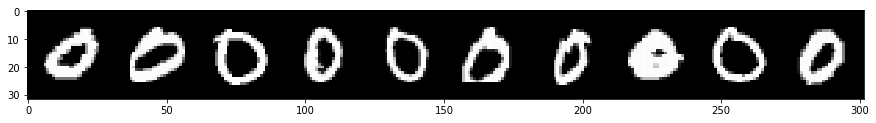

In [49]:
# grid -> (C, H, W)
grid = torchvision.utils.make_grid(sample, nrow=10)
print(grid.shape)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

# print('labels:', labels)

In [32]:
print(type(train_set_image_0))

<class 'torch.Tensor'>


In [29]:
print(train_set_image_0.shape)

torch.Size([5923, 28, 28])


In [13]:
sample = next(iter(train_set))

In [14]:
len(sample)

2

In [13]:
type(sample)

tuple

In [14]:
image, label = sample

In [15]:
image.shape

torch.Size([1, 28, 28])

In [16]:
label.shape

AttributeError: 'int' object has no attribute 'shape'

label: 9


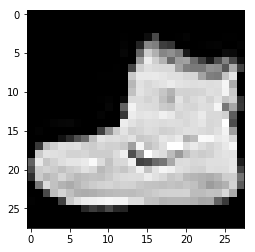

In [17]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

### Working with the data loader

In [18]:
batch = next(iter(train_loader))

In [19]:
len(batch)

2

In [20]:
type(batch)

list

In [21]:
images, labels = batch

In [22]:
images.shape

torch.Size([10, 1, 28, 28])

In [23]:
labels.shape

torch.Size([10])

torch.Size([3, 32, 302])
labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


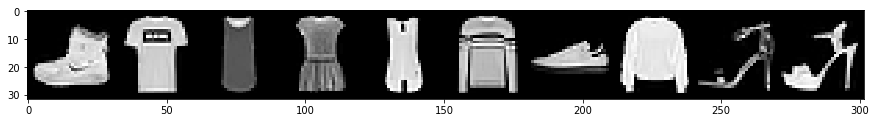

In [24]:
# grid -> (C, H, W)
grid = torchvision.utils.make_grid(images, nrow=10)
print(grid.shape)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

## Build PyTorch CNN - Object Oriented Neural Networks

Link: http://deeplizard.com/learn/video/k4jY9L8H89U

### Object Oriented Programming Review

In [38]:
class Lizard:
    def __init__(self, name):
        self.name = name
        
    def set_name(self, name):
        self.name = name

In [39]:
lizard = Lizard('deep')
print(lizard.name)

deep


In [40]:
lizard.set_name('lizard')
print(lizard.name)

lizard


### PyTorch Network

In [41]:
class Network:
    def __init__(self):
        self.layer = None
        
    def forward(self, t):
        t = self.layer(t)
        return t

In [42]:
import torch
import torch.nn as nn

In [43]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        #implement the forward pass
        return t

In [44]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

## PyTorch CNN Weights - Learnable Parameters in Neural Networks

Link: http://deeplizard.com/learn/video/stWU37L91Yc

In [45]:
import torch
import torch.nn as nn

In [76]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        #implement the forward pass
        return t

In [77]:
network = Network()

In [78]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [49]:
class Network():#nn.Module):
    def __init__(self):
        #super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        #implement the forward pass
        return t

In [50]:
network = Network()

In [51]:
print(network)

In [52]:
class Network():#nn.Module):
    def __init__(self):
        #super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        #implement the forward pass
        return t
    
    def __repr__(self):
        return "lizardnet"

In [53]:
network = Network()

In [54]:
print(network)

lizardnet


### Accessing the Layers

In [55]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [56]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [57]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [58]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [59]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [60]:
network

lizardnet

### Accessing the Weights

In [61]:
network.conv1.weight

Parameter containing:
tensor([[[[-1.9647e-01,  1.5765e-01,  1.0134e-01,  2.2856e-02, -1.6933e-01],
          [ 2.8201e-02, -1.3708e-01, -1.6442e-01,  1.1342e-01, -1.7819e-01],
          [-6.0562e-02, -4.9954e-03,  9.9505e-02, -6.2710e-02,  1.4868e-01],
          [-1.8624e-01, -4.2901e-02, -1.5708e-01, -1.1877e-01, -1.2571e-01],
          [ 1.3004e-02, -1.3562e-01, -1.8174e-01,  1.2052e-01,  9.0060e-02]]],


        [[[-2.6234e-02, -4.8895e-02, -1.7439e-02,  6.3177e-02,  5.9678e-02],
          [ 1.7110e-01,  2.5132e-02, -1.2151e-01, -1.0477e-01, -1.0485e-01],
          [-1.6736e-02,  8.8730e-02,  2.0383e-02, -1.0798e-01, -1.7304e-01],
          [ 7.4250e-02, -1.7505e-01, -9.6805e-02,  6.1313e-02,  5.7079e-02],
          [-1.7861e-01,  1.7065e-01, -1.9656e-02, -2.3924e-02, -6.7571e-03]]],


        [[[-2.5730e-02, -8.4908e-02, -3.7581e-02, -1.6442e-01, -1.0435e-01],
          [ 1.7557e-01, -1.7027e-01,  3.8082e-03,  1.9292e-01,  1.8647e-01],
          [-1.1356e-01,  7.5395e-02,  1.9921e-

In [62]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [63]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [64]:
network.conv2.weight[0].shape

torch.Size([6, 5, 5])

In [65]:
network.fc1.weight.shape

torch.Size([120, 192])

In [66]:
network.fc2.weight.shape

torch.Size([60, 120])

In [67]:
network.out.weight.shape

torch.Size([10, 60])

Looking at the linear layers.

In [68]:
network

lizardnet

In [69]:
network.fc1.weight.shape

torch.Size([120, 192])

In [70]:
network.fc2.weight.shape

torch.Size([60, 120])

In [71]:
network.out.weight.shape

torch.Size([10, 60])

### Matrix Multiplication

In [72]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

In [73]:
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

In [74]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

### Accessing the Parameters

In [79]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [80]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


# PyTorch Callable Neural Networks – Linear Layer in Depth

In [81]:
import torch.nn as nn

In [82]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

In [83]:
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

In [93]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [94]:
fc = nn.Linear(in_features=4, out_features=3)

In [95]:
fc.weight = nn.Parameter(weight_matrix)

In [96]:
fc(in_features)

tensor([29.9559, 40.0088, 49.9206], grad_fn=<AddBackward0>)

In [97]:
fc = nn.Linear(in_features=4, out_features=3, bias=False)
fc.weight = nn.Parameter(weight_matrix)
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

# Build PyTorch CNN - Forward Method Implementation

In [164]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t